In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize

In [2]:
def format_ticks(y, _):
        # Format with 2 decimals
        s = f'{y:.3f}'
        # Remove trailing zeros and dot if needed
        if '.' in s:
            s = s.rstrip('0').rstrip('.')
        # Remove leading zero before decimal point
        if s.startswith('0.') or s.startswith('-0.'):
            s = s.replace('0.', '.')
        return s

In [3]:
genie_df = pd.read_csv("../../results/random_targets_wasserstein_genie3_kidney.csv")
genie_bh_df = pd.read_csv("../../results/random_targets_wasserstein_genie3_kidney_benjamini_hb.csv")
lasso_df = pd.read_csv("../../results/random_targets_wasserstein_lasso_updated.csv")
lasso_bh_df = pd.read_csv("../../results/random_targets_wasserstein_lasso_benjamini_updated.csv")
genie_df


,tissue,num_non_tfs,num_tfs,mae,f1_005,f1_001,abs_time_saving,rel_time_saving,abs_emission_saving,rel_emission_saving,total_runtime,correlation,tp_001
0,Kidney,3,-1,0.022327,0.944465,0.891977,88147.827664,8.437272,10.187980,33.651700,11852.172336,0.994743,1506936
1,Kidney,4,-1,0.022241,0.944020,0.892260,87753.773453,8.165781,10.181863,33.004646,12246.226547,0.994866,1503733
2,Kidney,5,-1,0.022089,0.945164,0.894926,88526.836600,8.715992,10.190739,33.951934,11473.163400,0.994873,1522325
3,Kidney,6,-1,0.020359,0.945646,0.895825,90175.121468,10.178243,10.240908,40.526076,9824.878532,0.995629,1514627
4,Kidney,7,-1,0.020193,0.945886,0.895795,81051.488732,5.277459,10.015715,21.681456,18948.511268,0.995708,1521173
5,Kidney,8,-1,0.019970,0.946405,0.896612,79100.913899,4.784898,9.957628,19.359422,20899.086101,0.995817,1521413
6,Kidney,9,-1,0.019687,0.946112,0.896637,73702.912485,3.802702,9.818673,15.411113,26297.087515,0.995932,1512766
7,Kidney,10,-1,0.019258,0.946202,0.897864,71770.955992,3.542451,9.804483,15.096689,28229.044008,0.996103,1520065
8,Kidney,20,-1,0.018404,0.946842,0.901645,66500.339591,2.985105,9.590059,11.539209,33499.660409,0.996434,1535579
9,Kidney,30,-1,0.017923,0.947586,0.902905,65545.998467,2.902420,9.600930,11.678736,34454.001533,0.996598,1535445


/tmp/ipykernel_813890/436227249.py:8: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  line1 = sns.lineplot(
/tmp/ipykernel_813890/436227249.py:28: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  line2 = sns.lineplot(


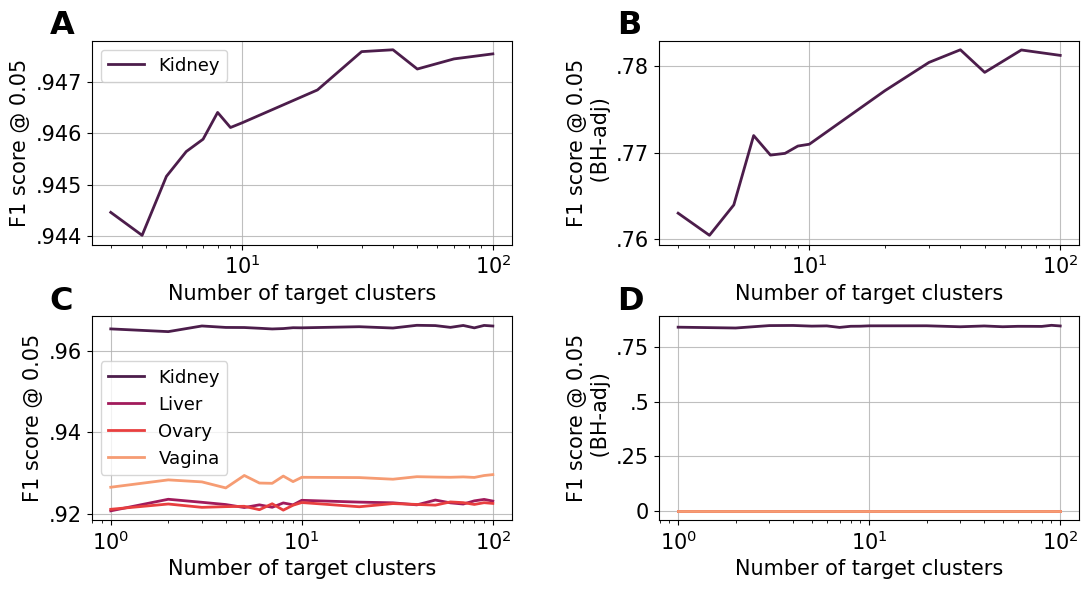

In [4]:
# Create one large mosaic plot.
fig, axs = plt.subplot_mosaic([['A', 'B'], ['C', 'D']])
fig.set_size_inches(11, 6)
axs_list = list(axs.values())
label_fontsize = 15

### GENIE3 Plots.
line1 = sns.lineplot(
data=genie_df,
x='num_non_tfs',
y='f1_005',
ax=axs['A'],
palette=sns.color_palette("rocket", 4),
linewidth=2.0,
hue='tissue',
legend=True
)
legend = axs['A'].legend(title=None, fontsize=label_fontsize-2)  # set font size for entries
axs['A'].set_xlabel('Number of target clusters', fontsize=label_fontsize)
axs['A'].set_ylabel('F1 score @ 0.05', fontsize=label_fontsize)
axs['A'].tick_params(axis='x', labelsize=label_fontsize)
axs['A'].tick_params(axis='y', labelsize=label_fontsize)
formatter = FuncFormatter(format_ticks)
axs['A'].yaxis.set_major_formatter(formatter)
axs['A'].grid(True, alpha=0.8)
axs['A'].set_xscale('log')
    
line2 = sns.lineplot(
    data=genie_bh_df,
    x='num_non_tfs',
    y='f1_005',
    ax=axs['B'],
    palette=sns.color_palette("rocket", 4),
    linewidth=2.,
    hue="tissue",
    legend=False
)
#legend = axs['B'].legend(title=None, fontsize=label_fontsize)  # set font size for entries
#legend.set_title(None)  # just to be explicit, removes title if Seaborn adds one

axs['B'].set_xlabel('Number of target clusters', fontsize=label_fontsize)
axs['B'].set_ylabel("F1 score @ 0.05\n (BH-adj)", fontsize=label_fontsize)
axs['B'].tick_params(axis='x', labelsize=label_fontsize)
axs['B'].tick_params(axis='y', labelsize=label_fontsize)
formatter = FuncFormatter(format_ticks)
# Apply to y-axis
axs['B'].yaxis.set_major_formatter(formatter)
axs['B'].grid(True, alpha=0.8)
axs['B'].set_xscale('log')

### LASSO regression. 
line1 = sns.lineplot(
data=lasso_df,
x='num_non_tfs',
y='f1_005',
ax=axs['C'],
hue='tissue',
palette=sns.color_palette("rocket", 4),
linewidth=2.,
legend=True
)
axs['C'].set_xlabel('Number of target clusters', fontsize=label_fontsize)
axs['C'].set_ylabel("F1 score @ 0.05", fontsize=label_fontsize)
axs['C'].tick_params(axis='x', labelsize=label_fontsize)
axs['C'].tick_params(axis='y', labelsize=label_fontsize)
formatter = FuncFormatter(format_ticks)
axs['C'].yaxis.set_major_formatter(formatter)
axs['C'].grid(True, alpha=0.8)
axs['C'].set_xscale('log')
legend = axs['C'].legend(title=None, fontsize=label_fontsize-2)  # set font size for entries
axs['C'].set_xlabel('Number of target clusters', fontsize=label_fontsize)
    
line2 = sns.lineplot(
    data=lasso_bh_df,
    x='num_non_tfs',
    y='f1_005',
    ax=axs['D'],
    hue='tissue',
    palette=sns.color_palette("rocket", 4)  ,
    linewidth=2.,
    legend=False
)

axs['D'].set_xlabel('Number of target clusters', fontsize=label_fontsize)
axs['D'].set_ylabel("F1 score @ 0.05\n (BH-adj)", fontsize=label_fontsize)
axs['D'].tick_params(axis='x', labelsize=label_fontsize)
axs['D'].tick_params(axis='y', labelsize=label_fontsize)
formatter = FuncFormatter(format_ticks)
# Apply to y-axis
axs['D'].yaxis.set_major_formatter(formatter)
axs['D'].grid(True, alpha=0.8)
axs['D'].set_xscale('log')

labels = {'A': 'A', 'B': 'B', 'C': 'C', 'D': 'D'}

for key, label in labels.items():
    ax = axs[key]
    ax.text(
        -0.1, 1.15, label,
        transform=ax.transAxes,
        fontsize=23,
        fontweight='bold',
        va='top',
        ha='left'
    )

fig.tight_layout()
fig.subplots_adjust(hspace=0.35, wspace=0.35)
plt.savefig("supplement_genie3_lasso_approximation.pdf", format='pdf', bbox_inches='tight')
